In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import numpy as np


In [2]:
from IPython.display import HTML
style = "<style>svg{width:30% !important;height:30% !important;}</style>"
HTML(style)

### ТЕСТОВАЯ задача - работа с длиной лепестков ирисов

In [14]:
iris_data_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)

iris_data_train.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [15]:
iris_data_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

iris_data_test.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


смотрим какие уникальные значения есть у переменной , которую хотим предсказывать

In [5]:
iris_data_train.species.unique()

array([2, 0, 1])

In [6]:
iris_data_test.species.unique()

array([2, 1, 0])

смотрим какого типа данные содержатся в таблице - чтобы если что предобработать датасэт

In [7]:
iris_data_train.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [8]:
iris_data_train.dtypes

Unnamed: 0        int64
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species           int64
dtype: object

обозначим зависимую переменную и независимые переменные

для обучения возьмем тренировочный датасэт

In [16]:
X_train = iris_data_train.drop(['species'], axis=1 )
y_train = iris_data_train.species




для проверки данных возьмем тестовый датасэт

In [17]:
X_test = iris_data_test.drop(['species'], axis=1 )
y_test = iris_data_test.species

прогоним модель классификатора по 99 разным глубинам:

In [21]:
scores_iris_data = pd.DataFrame()

max_depth_values = range(1, 100) 
rs = np.random.seed(0)

for max_depth in max_depth_values:

    clf_iris = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf_iris.fit(X_train, y_train)
    train_score = clf_iris.score(X_train, y_train)

    accuracy_score= clf_iris.score(X_test, y_test)
    
    
    #accuracy_score = cross_val_score(clf_iris, X_test, y_test , cv=5).mean()        
                                                                                        
    
    temp_score_iris_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'accuracy_score': [accuracy_score]})
    scores_iris_data = pd.concat([scores_iris_data, temp_score_iris_data])

scores_iris_data

,max_depth,train_score,accuracy_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
...,...,...,...
0,95,1.00,0.92
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.94


переформатируем датасэт для удобства построения графика:

In [22]:
scores_iris_data_long = pd.melt(scores_iris_data, id_vars=['max_depth'], value_vars=['train_score', 'accuracy_score'],
                          var_name='set_type', value_name='score')
scores_iris_data_long



,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
193,95,accuracy_score,0.92
194,96,accuracy_score,0.92
195,97,accuracy_score,0.92
196,98,accuracy_score,0.94


строим график

<AxesSubplot: xlabel='max_depth', ylabel='score'>

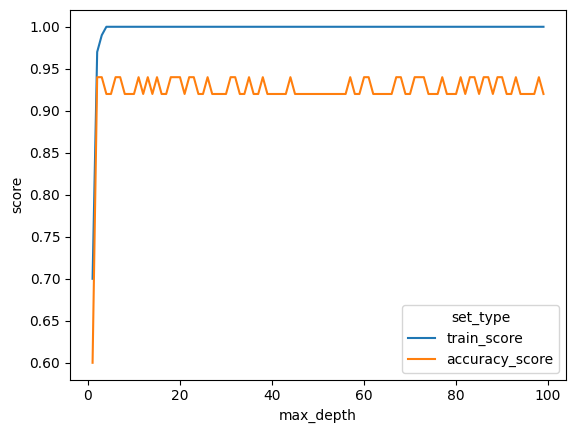

In [23]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_iris_data_long)